In [254]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

In [255]:

datafile = pd.read_csv('Mall_Customers.csv')
datafile.head()

,CID,Gender,Age,Income,SS
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0


In [256]:
datafile.shape

(202, 5)

In [257]:
datafile.dtypes

CID         int64
Gender     object
Age       float64
Income    float64
SS        float64
dtype: object

In [261]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 5 columns):
CID       202 non-null int64
Gender    202 non-null object
Age       201 non-null float64
Income    201 non-null float64
SS        200 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.0+ KB


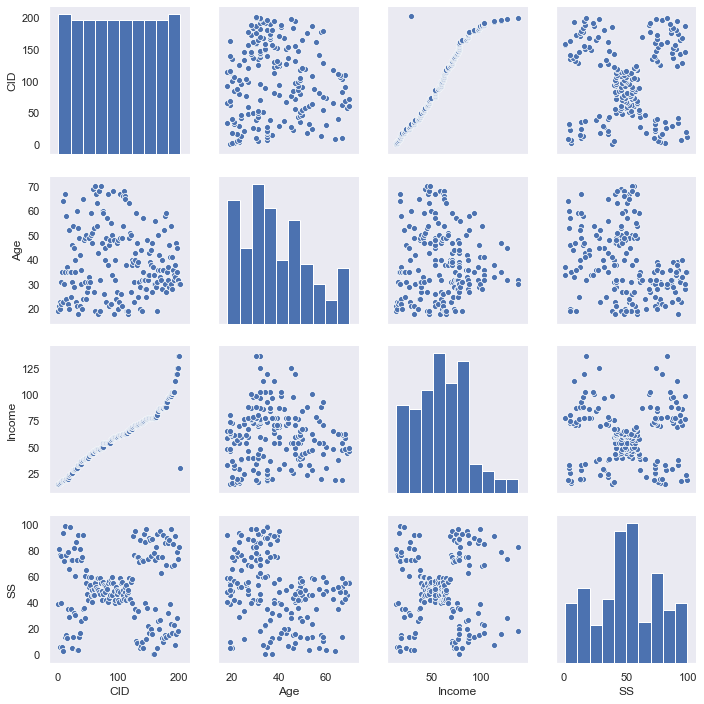

In [262]:
#We pairplot to check the correlations
sns.pairplot(datafile)

In [263]:
datafile.describe()

,CID,Age,Income,SS
count,202.000000,201.000000,201.000000,200.000000
mean,101.500000,38.805970,60.407960,50.200000
std,58.456537,13.948016,26.287502,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,51.250000,29.000000,40.000000,34.750000
50%,101.500000,36.000000,61.000000,50.000000
75%,151.750000,49.000000,78.000000,73.000000
max,202.000000,70.000000,137.000000,99.000000


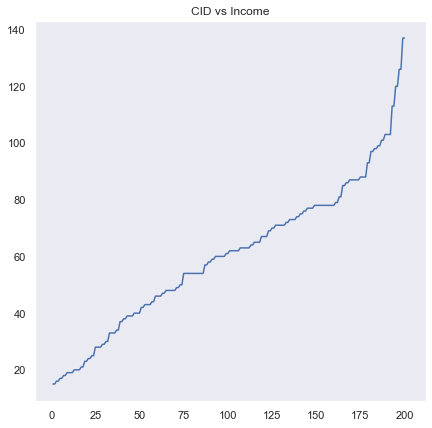

In [264]:
x = datafile['CID']
y = datafile['Income']
plt.title('CID vs Income')
plt.plot(x, y)


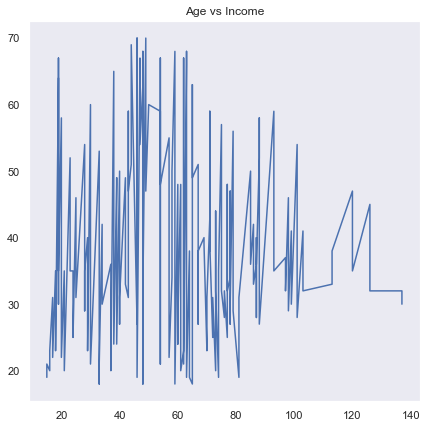

In [265]:
x = datafile['Income']
y = datafile['Age']
plt.title('Age vs Income')
plt.plot(x, y)


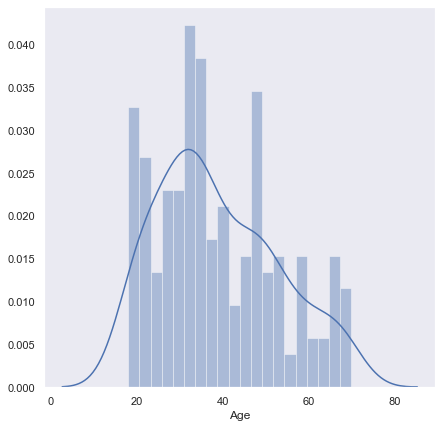

In [274]:
# plot the data in a simple histogram
sns.distplot(datafile['Age'], bins=20)

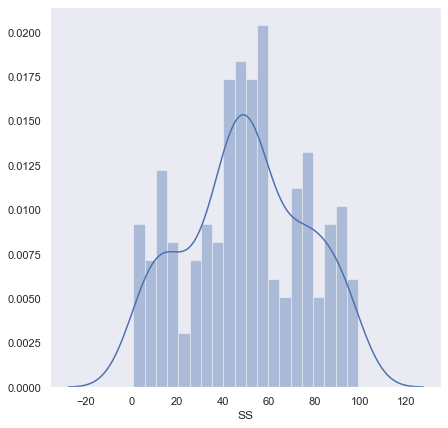

In [275]:
sns.distplot(datafile['SS'], bins=20)

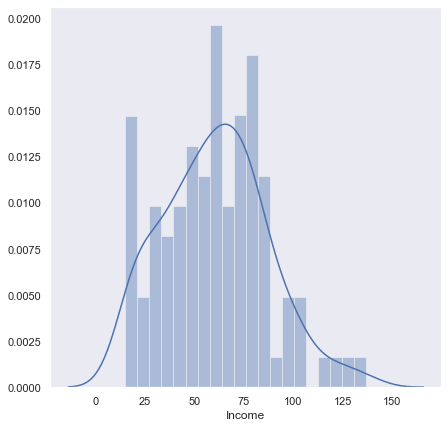

In [276]:
sns.distplot(datafile['Income'], bins=20)

In [277]:
datafile.shape


(200, 5)

In [278]:
datafile.isnull().sum()

CID       0
Gender    0
Age       0
Income    0
SS        0
dtype: int64

In [279]:
datafile = datafile.dropna(subset=['Income'])
datafile = datafile.dropna(subset=['SS'])

In [280]:
datafile.shape

(200, 5)

In [281]:
datafile.head()

,CID,Gender,Age,Income,SS
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0


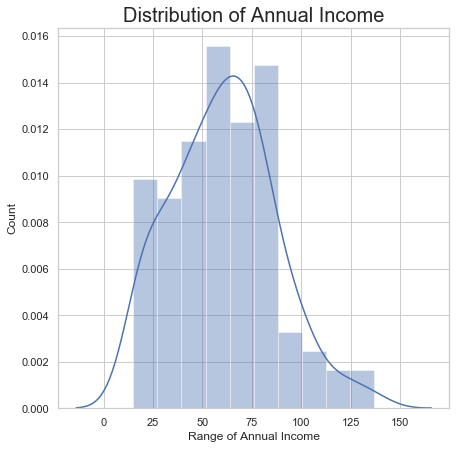

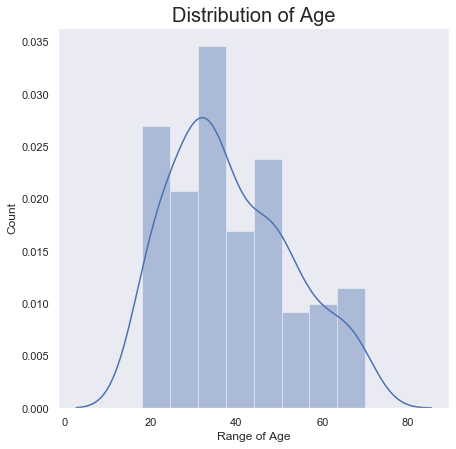

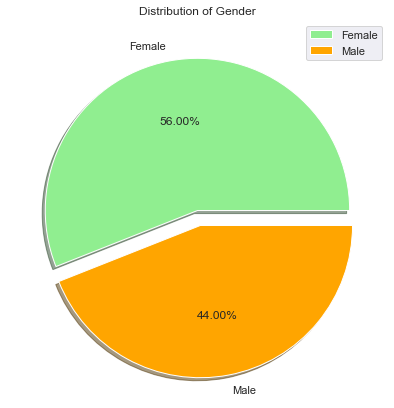

In [282]:
sns.set(style = 'whitegrid')
sns.distplot(datafile['Income'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()
sns.set(style = 'dark')
sns.distplot(datafile['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()
datafile['Gender'].value_counts()

labels = ['Female', 'Male']
size = [112, 88]
colors = ['lightgreen', 'orange']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Distribution of Gender')
plt.axis('off')
plt.legend()
plt.show()

In [283]:
# calculate z-scores for column "Annual Income (k$)"
datafile['Income standarized'] = (datafile['Income'] - datafile['Income'].mean()) / datafile['Income'].std()
len(datafile[(datafile['Income standarized'] > -3)&(datafile['Income standarized'] < 3)]) / len(datafile)

1.0

Income seems to be normalised
We continue

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.
reference:https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [284]:
datafile.describe()

,CID,Age,Income,SS,Income standarized
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,100.500000,38.850000,60.560000,50.200000,1.243450e-16
std,57.879185,13.969007,26.264721,25.823522,1.000000e+00
min,1.000000,18.000000,15.000000,1.000000,-1.734646e+00
25%,50.750000,28.750000,41.500000,34.750000,-7.256883e-01
50%,100.500000,36.000000,61.500000,50.000000,3.578945e-02
75%,150.250000,49.000000,78.000000,73.000000,6.640086e-01
max,200.000000,70.000000,137.000000,99.000000,2.910368e+00


In [285]:
datafile.shape
x = datafile.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


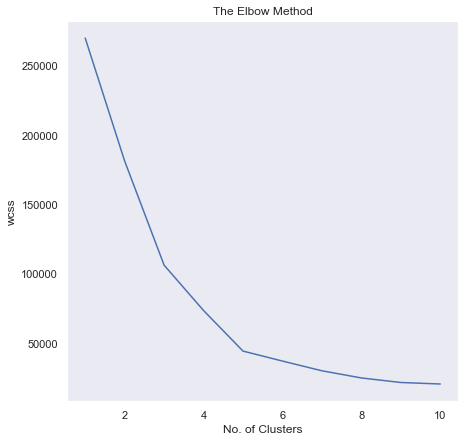

In [286]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

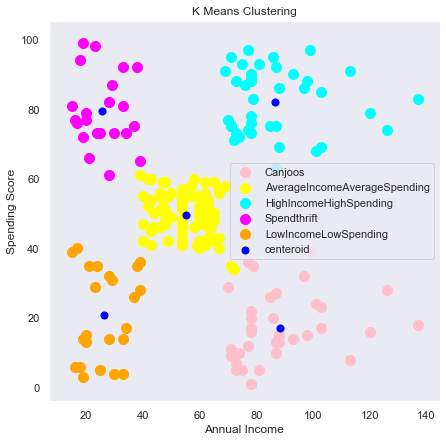

In [287]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Canjoos')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'AverageIncomeAverageSpending')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'HighIncomeHighSpending')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'LowIncomeLowSpending')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()